Typical Machine Learning workflow:

1. Problem formulation
2. Finding data
3. Exploring insights in data or EDA
4. Data preprocessing
5. Choosing and training a model
6. Evaluating a model

In this notebook, I have applied three machine learning models to classify mobile price ranges:

1. Logistic Regression – a simple but effective classification model.

2. Stochastic Gradient Descent (SGD) – an iterative optimization-based classifier suitable for large datasets.

3. Decision Tree Classifier – a non-linear model that splits data based on feature values.

# 1. Problem Formulation

I have a dataset containing the features of mobiles and the problem is to predict the price range, not the exact price. This dataset has been collected from Kaggle.

# 2. Finding the Data

Here are the details of the dataset:

* The dataset contains 21 input features.
* The target feature is price_range.
* The target variable has four categories representing different cost levels:
  * 0 → Low Cost
  * 1 → Medium Cost
  * 2 → High Cost
  * 3 → Very High Cost

👉 This makes it a multiclass classification problem, where the goal is to predict the correct price range of a mobile phone based on its features.

Input Features:

* **batter_power**: Total energy a battery can store in one time measured in mAh
* **blue**: Has bluetooth or not
* **clock_speed**: speed at which microprocessor executes instructions
* **dual_sim**: Has dual sim support or not
* **fc**: Front Camera mega pixels
* **four_g**: Has 4G or not
* **int_memory**: Internal Memory in Gigabytes
* **m_dep**: Mobile Depth in cm
* **mobile_wt**: Weight of mobile phone
* **n_cores**: Number of cores of processor
* **pc**: Primary Camera mega pixels
* **px_height**: Pixel Resolution Height
* **px_width**: Pixel Resolution Width
* **ram**: Random Access Memory in Mega Bytes
* **sc_h**: Screen Height of mobile in cm
* **sc_w**: Screen Width of mobile in cm
* **talk_time**: longest time that a single battery charge will last when you are talking
* **three_g**: Has 3G or not
* **touch_screen**: Has touch screen or not
* **wifi**: Has wifi or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
mobile_train = pd.read_csv('/content/mobile_data_train.csv')

In [3]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 3. Exploratory Data Analysis (EDA)

In [4]:
# checking summary statistics
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# checking missing values
mobile_train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Handling Missing Values
* In this dataset, I am lucky to not have missing values.
* If missing values were present, I would have three main options:
  1. Remove them completely
  2. Fill them using strategies like mean, median, or mode
  3. Leave them as they are (not ideal for most models)

⚠️ None of these options is always the "best" choice. It depends on:
* The problem type
* The size of the dataset

👉 Example:
* Removing values = loss of data
* Filling values = adding possible noise

There’s always a trade-off when imputing missing values.

In [6]:
# checking correlation between features
correlation = mobile_train.corr()
correlation['price_range']

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


<Axes: >

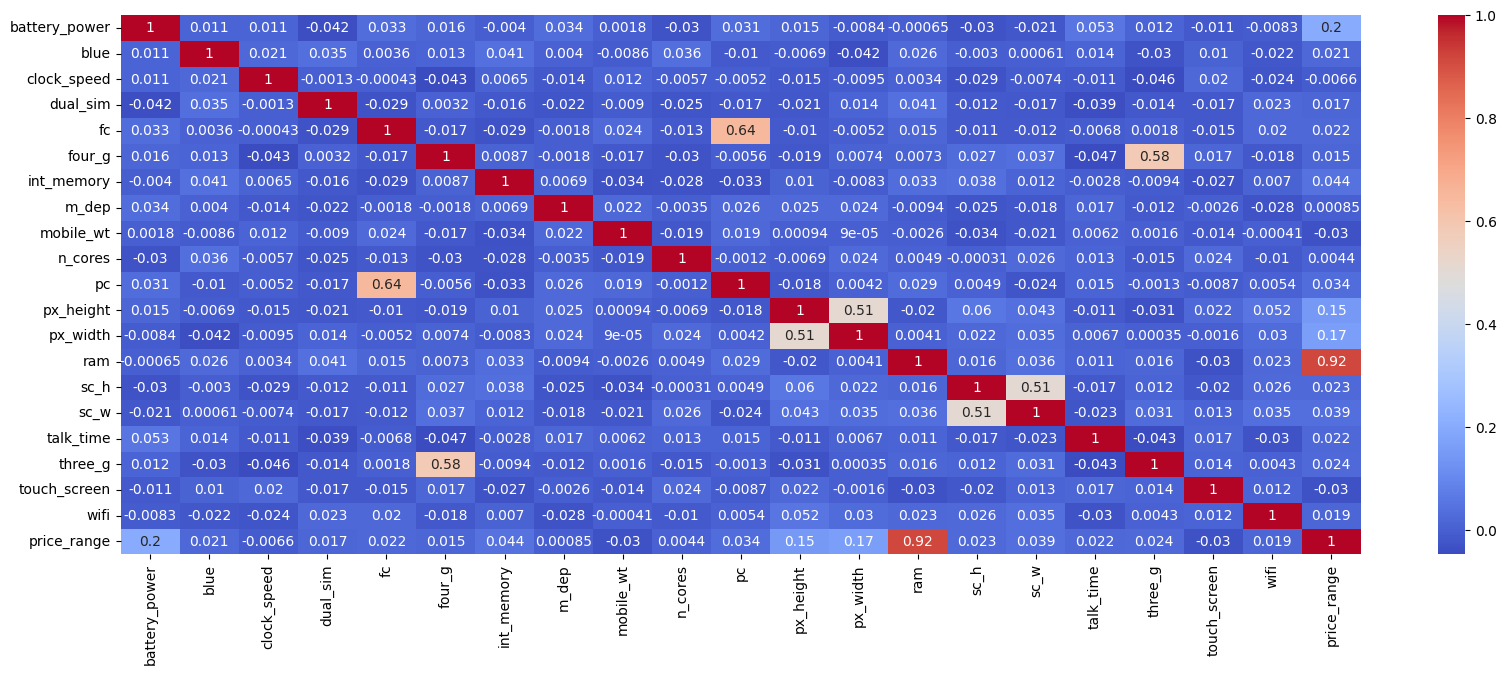

In [7]:
# visualizing correlation
plt.figure(figsize=(20, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Looking at the **correlation map**, I see that the **price_range** of mobiles is highly correlated with **RAM** (≈ 0.92).


👉 This means RAM is the **strongest determinant** of how expensive a phone is going to be. That makes sense for electronic devices in general.


Description of correlation:
  * 1 (or close to 1) → features contain the same info. Removing one won’t affect the model.
  
  * -1 (or close to -1) → features contain opposite info.


Other interesting insights:
* fc (front camera megapixels) is correlated with pc (primary camera megapixels).

* three_g and four_g show correlation → most 3G phones also support 4G.

* sc_h, sc_w (screen size) and px_height, px_width (pixel resolution) also show strong similarity.


➡️ Now, I’ll move from words to visualization! 📊

In [8]:
mobile_train['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


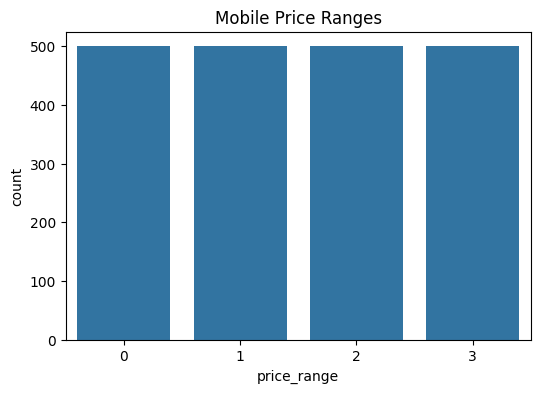

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='price_range', data=mobile_train)
plt.title('Mobile Price Ranges')
plt.show()


This is cool, the **price ranges are equally divided**.

I can confidently say that my dataset is balanced.

⚠️ Having **imbalanced classes** is a big issue because the model may learn only the dominant classes while failing to predict the underrepresented ones.

Next, I will explore the relation between **number of cores** and **price ranges**.

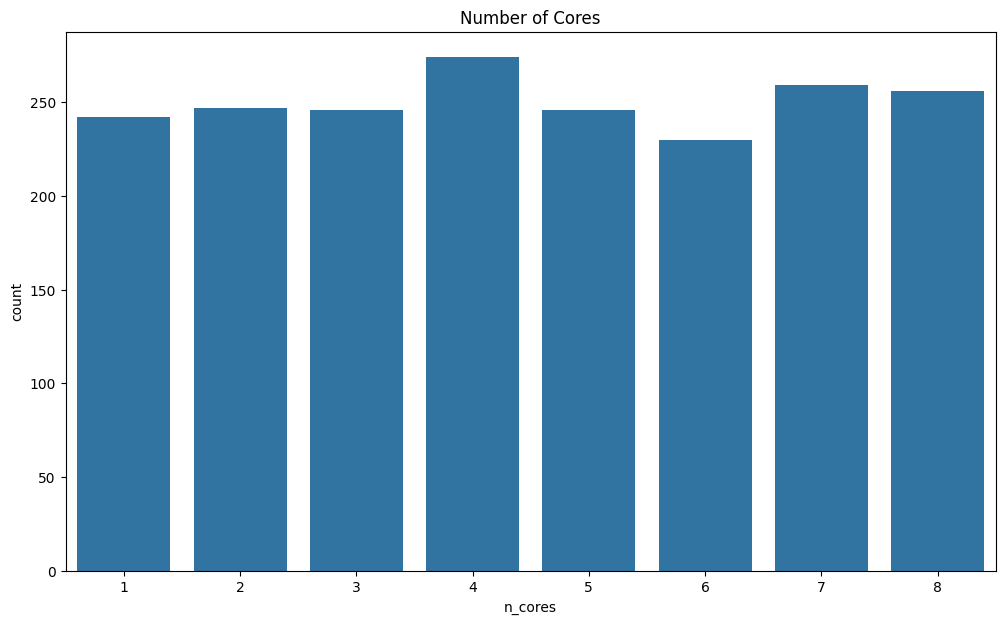

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(x='n_cores', data=mobile_train)
plt.title('Number of Cores')
plt.show()

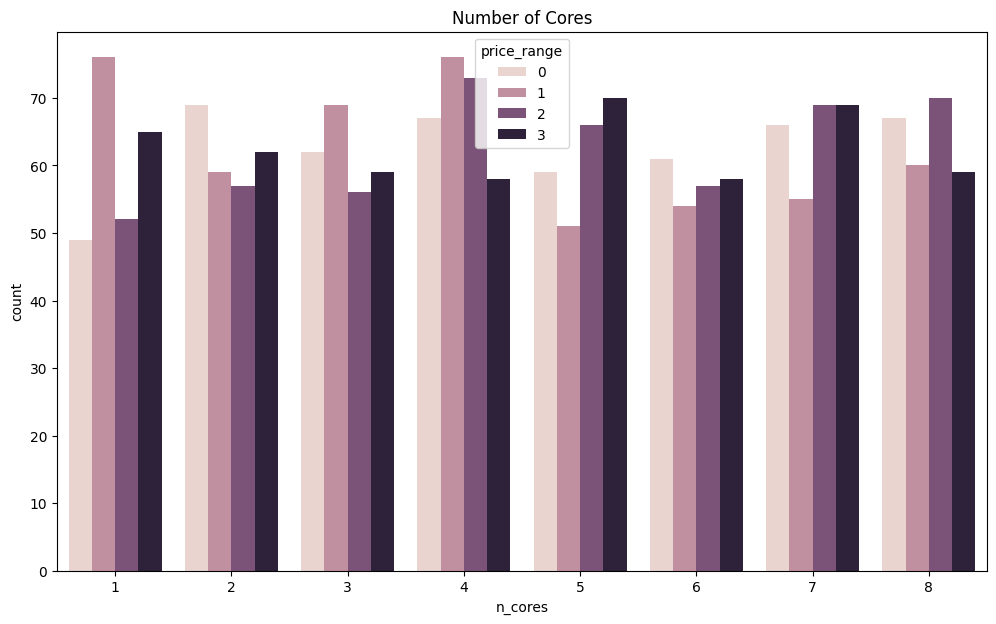

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x='n_cores', data=mobile_train, hue='price_range')
plt.title('Number of Cores')
plt.show()

I will now explore the distribution of features, starting with mobile weight and ram.

<Axes: xlabel='mobile_wt', ylabel='Count'>

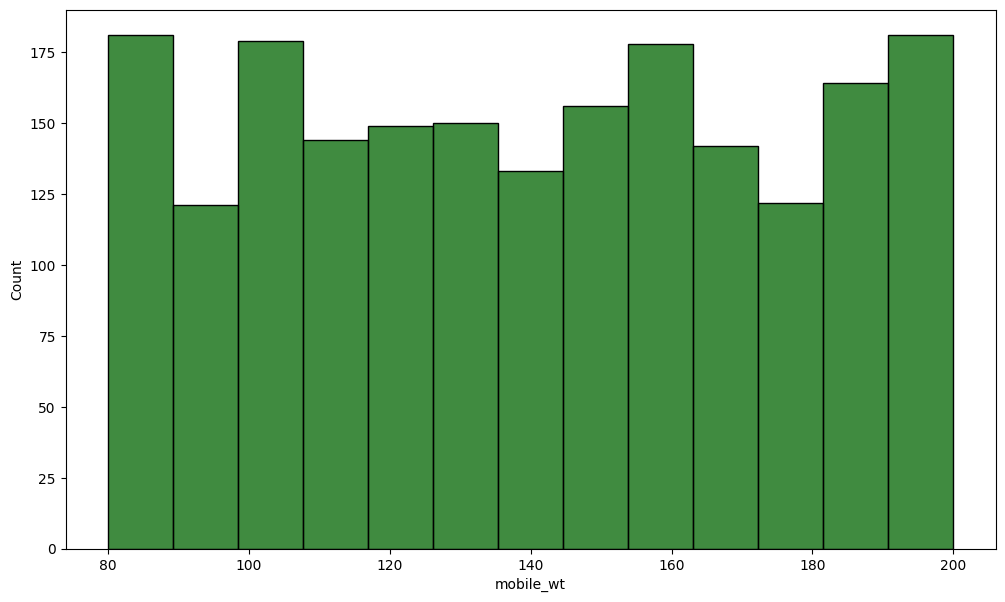

In [12]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', color='darkgreen')

<Axes: xlabel='mobile_wt', ylabel='Count'>

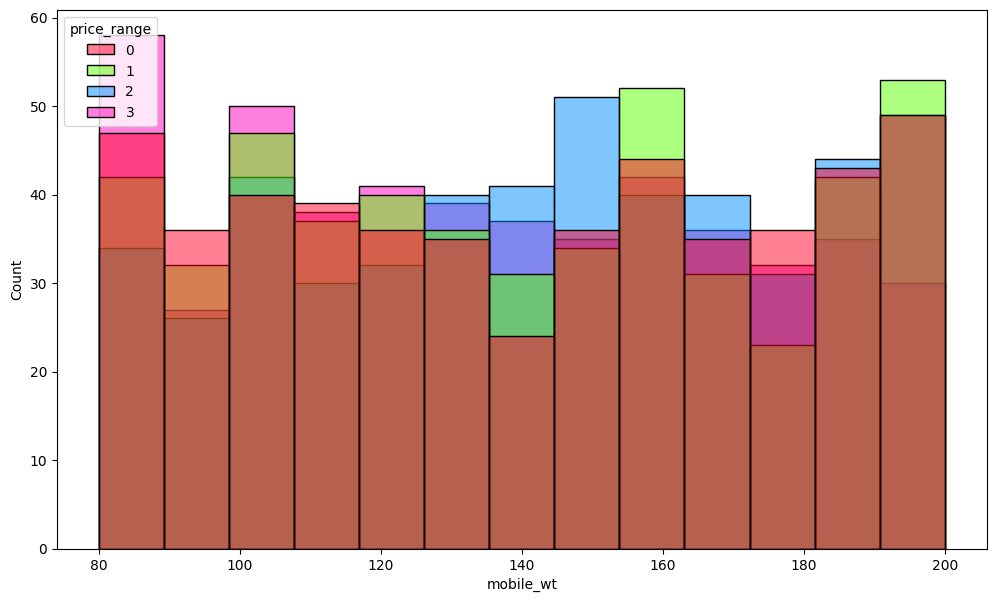

In [13]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', palette='gist_rainbow', hue='price_range')

/tmp/ipython-input-2426804101.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=mobile_train, x='ram', palette='PRGn')


<Axes: xlabel='ram', ylabel='Count'>

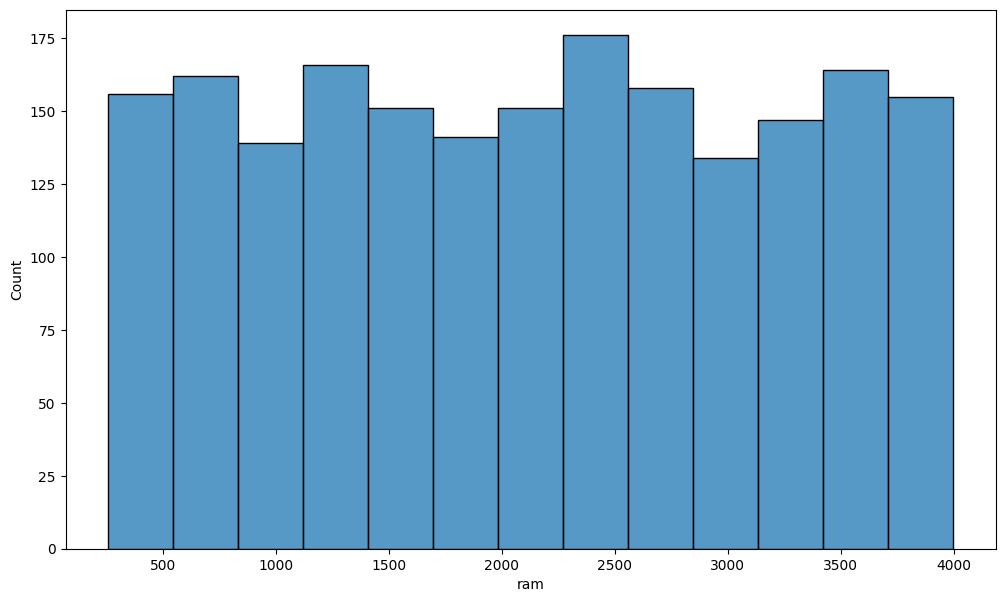

In [14]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', palette='PRGn')

<Axes: xlabel='ram', ylabel='Count'>

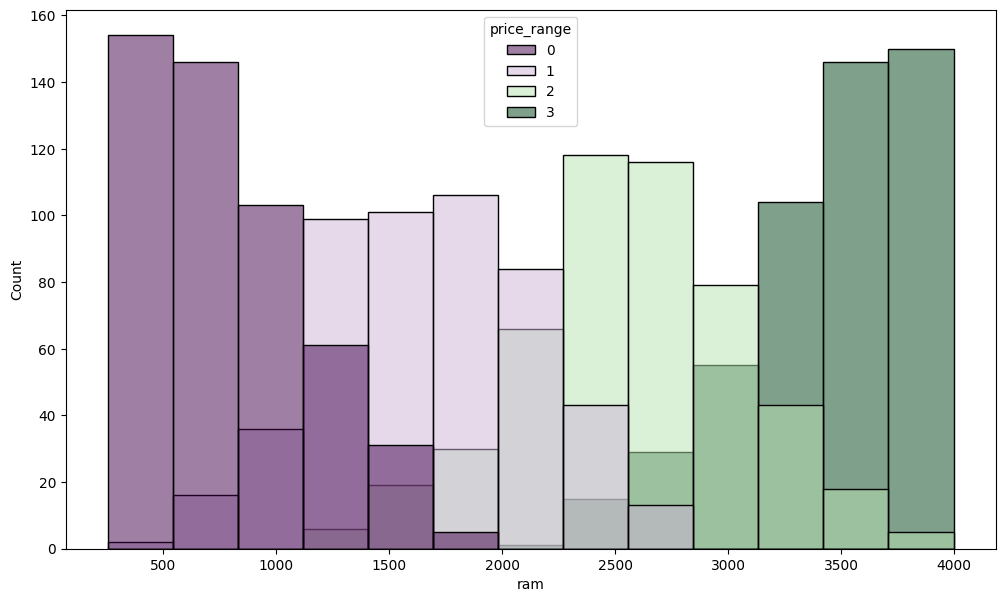

In [15]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', palette='PRGn', hue='price_range')

Again, it seems that the phones that has over 2.5G of RAM are very expensive and that makes sense. The RAM is the big factor to determine the price of the phone.

<Axes: xlabel='n_cores', ylabel='ram'>

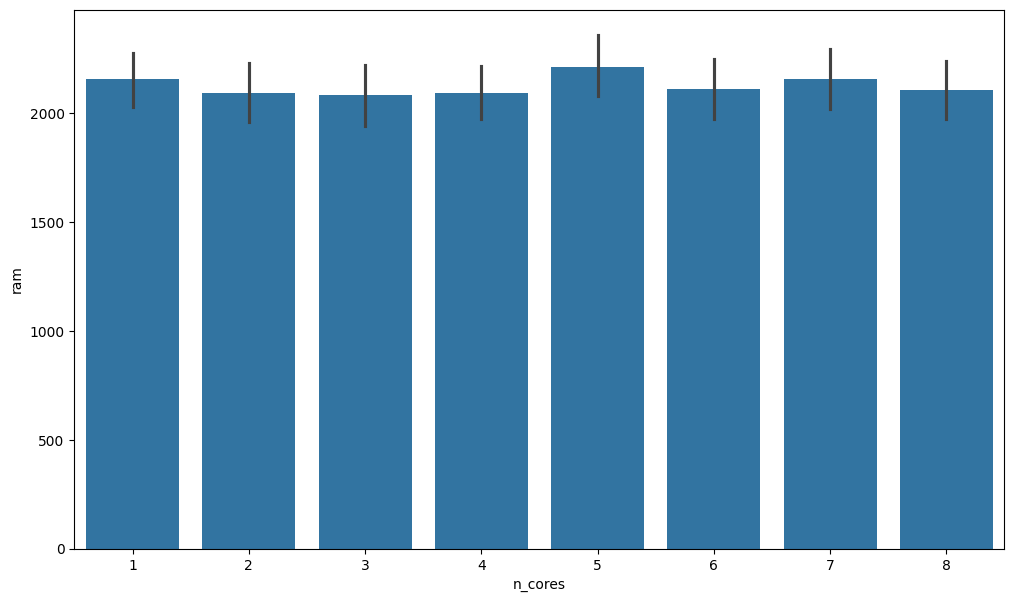

In [16]:
plt.figure(figsize=(12,7))

sns.barplot(data=mobile_train, x='n_cores', y='ram')

`n_cores` is the number of cores possessed by a given processor. Plotting it with RAM, it doesn't show something remarkable.


I can also try to visualize the relationship between some features, typically starting with the features that I found correlating.

Text(0.5, 1.0, 'Front Camera Vs Primary Camera')

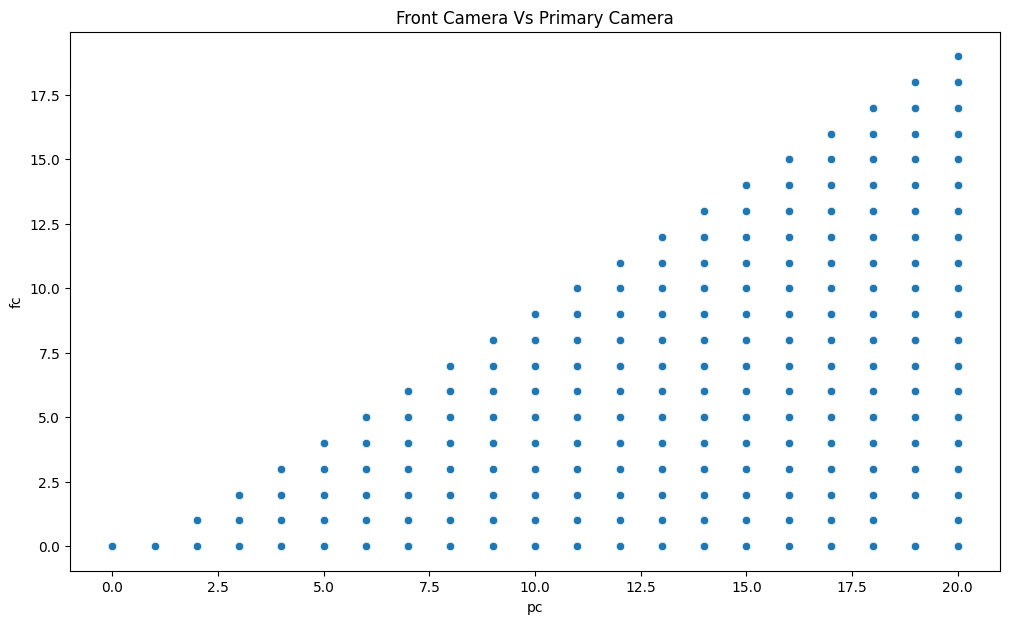

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=mobile_train, x='pc', y='fc')
plt.title('Front Camera Vs Primary Camera')

<Axes: xlabel='px_height', ylabel='px_width'>

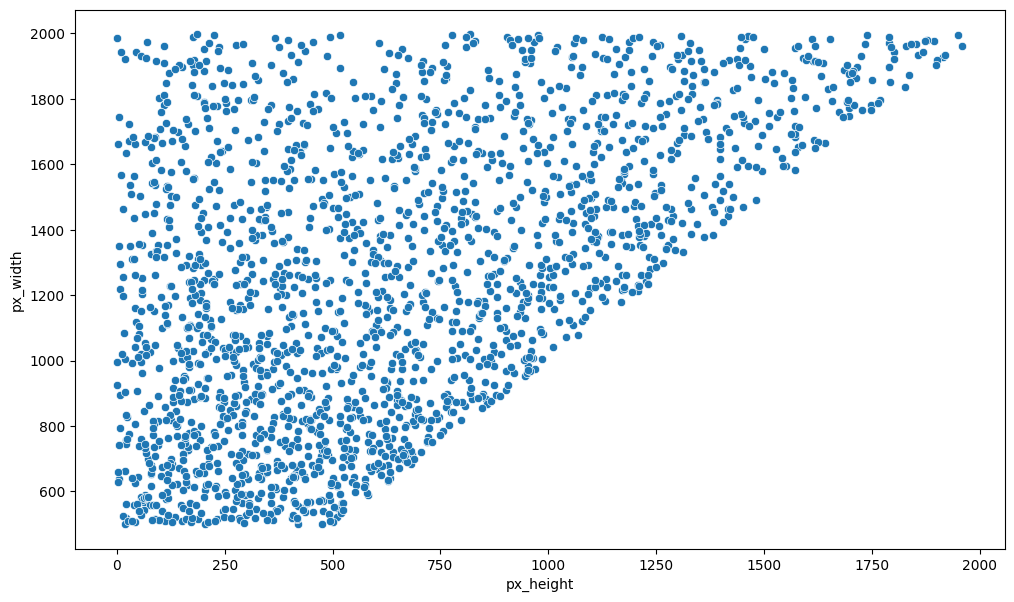

In [18]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='px_height', y='px_width')

At first, I thought that batter_power and talk_time(longest time that a single battery charge will last when I am talking) would have a linear relationship since I know it does, but it seems it's not.

<Axes: xlabel='battery_power', ylabel='talk_time'>

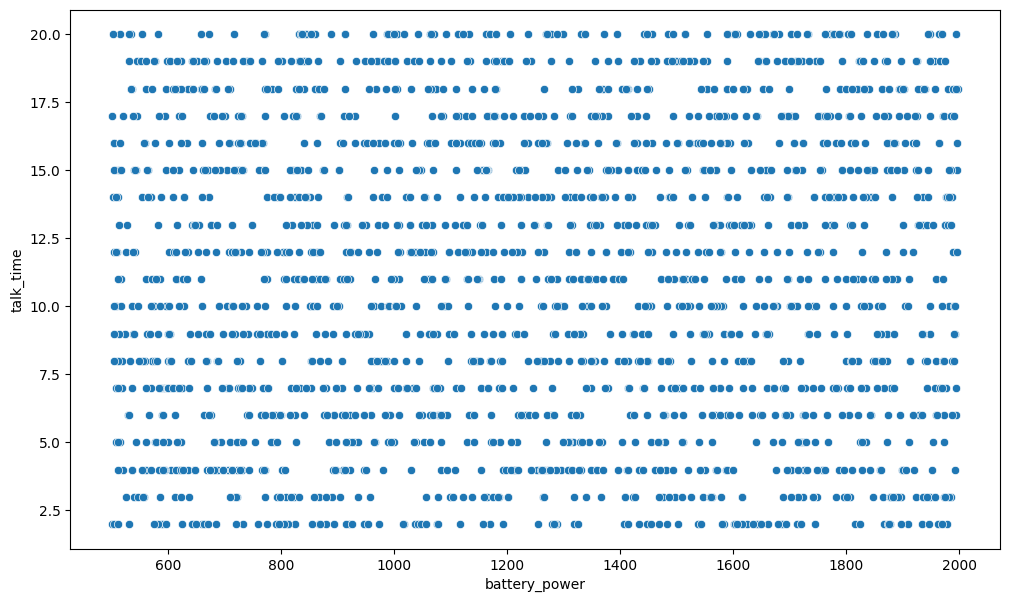

In [19]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='battery_power', y='talk_time')

### Exploring Categorical Features

Even if all features have numerical values, but there some of them which are categorical. I'm gonna inspect them!! It might be that they are already encoded!

The number of mobile that have bluetooth: 990
The number of mobile that don't have bluetooth: 1010


<Axes: ylabel='count'>

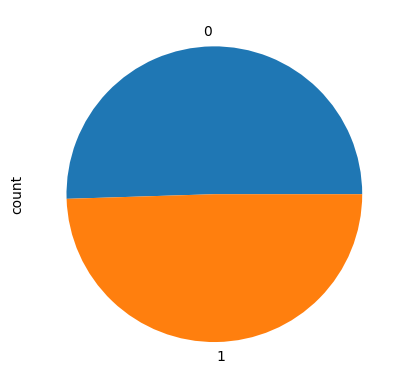

In [20]:
# displaying number of phones which have or don't have bluetooth
blue_count = mobile_train['blue'].value_counts()
print("The number of mobile that have bluetooth: {}\nThe number of mobile that don't have bluetooth: {}".format(blue_count[1], blue_count[0]))

blue_count.plot(kind='pie')

The number of mobile that have wifi: 1014
The number of mobile that don't have wifi: 986


<Axes: ylabel='count'>

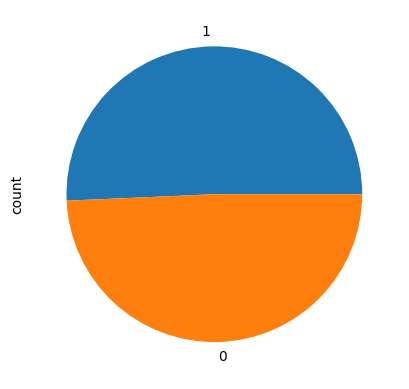

In [21]:
# displaying number of phones which have or don't have wifi
wifi_count = mobile_train['wifi'].value_counts()

print("The number of mobile that have wifi: {}\nThe number of mobile that don't have wifi: {}".format(wifi_count[1], wifi_count[0]))

wifi_count.plot(kind='pie')

The number of mobiles that have dual sim capacity: 1019
The number of mobiles that don't have dual sim capacity: 981


<Axes: ylabel='count'>

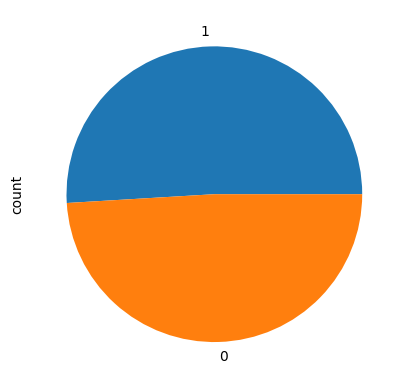

In [22]:
# Displaying number of phones which have or don't have dual simcards
sim_count = mobile_train['dual_sim'].value_counts()

print("The number of mobiles that have dual sim capacity: {}\nThe number of mobiles that don't have dual sim capacity: {}".format(sim_count[1], sim_count[0]))

sim_count.plot(kind='pie')

The number of mobiles that have 3G capacity: 1523
The number of mobiles that don't have 3G capacity: 477


<Axes: ylabel='count'>

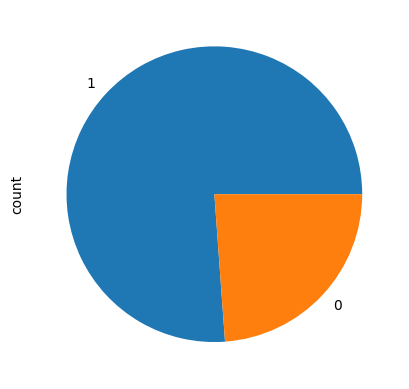

In [23]:
# Displaying number of phones which have or don't have 3g
count_3g = mobile_train['three_g'].value_counts()

print("The number of mobiles that have 3G capacity: {}\nThe number of mobiles that don't have 3G capacity: {}".format(count_3g[1], count_3g[0]))

count_3g.plot(kind='pie')

The number of mobiles that have 4G capacity: 1043
The number of mobiles that don't have 4G capacity: 957


<Axes: ylabel='count'>

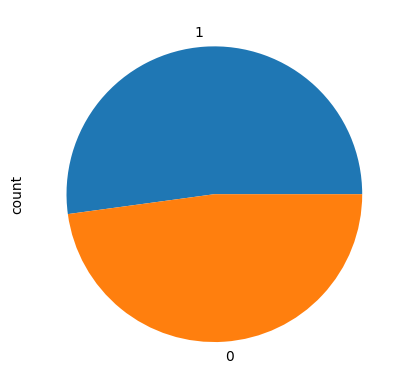

In [24]:
# Displaying number of phones which have or don't have 4g

count_4g = mobile_train['four_g'].value_counts()
print("The number of mobiles that have 4G capacity: {}\nThe number of mobiles that don't have 4G capacity: {}".format(count_4g[1], count_4g[0]))

count_4g.plot(kind='pie')

The number of mobiles that have touch screens: 1006
The number of mobiles that don't have touch screen: 994


<Axes: ylabel='count'>

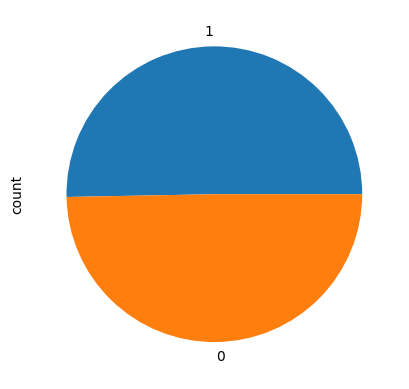

In [25]:
# Displaying number of phones which have or don't have touchscreen

touch_scr = mobile_train['touch_screen'].value_counts()

print("The number of mobiles that have touch screens: {}\nThe number of mobiles that don't have touch screen: {}".format(touch_scr[1], touch_scr[0]))

touch_scr.plot(kind='pie')

Some numerical features (e.g., n_cores) can be treated as categorical.

Among binary features, 3G is more common than 4G, while others are nearly equal.

Pairplots help explore relationships between numerical features.

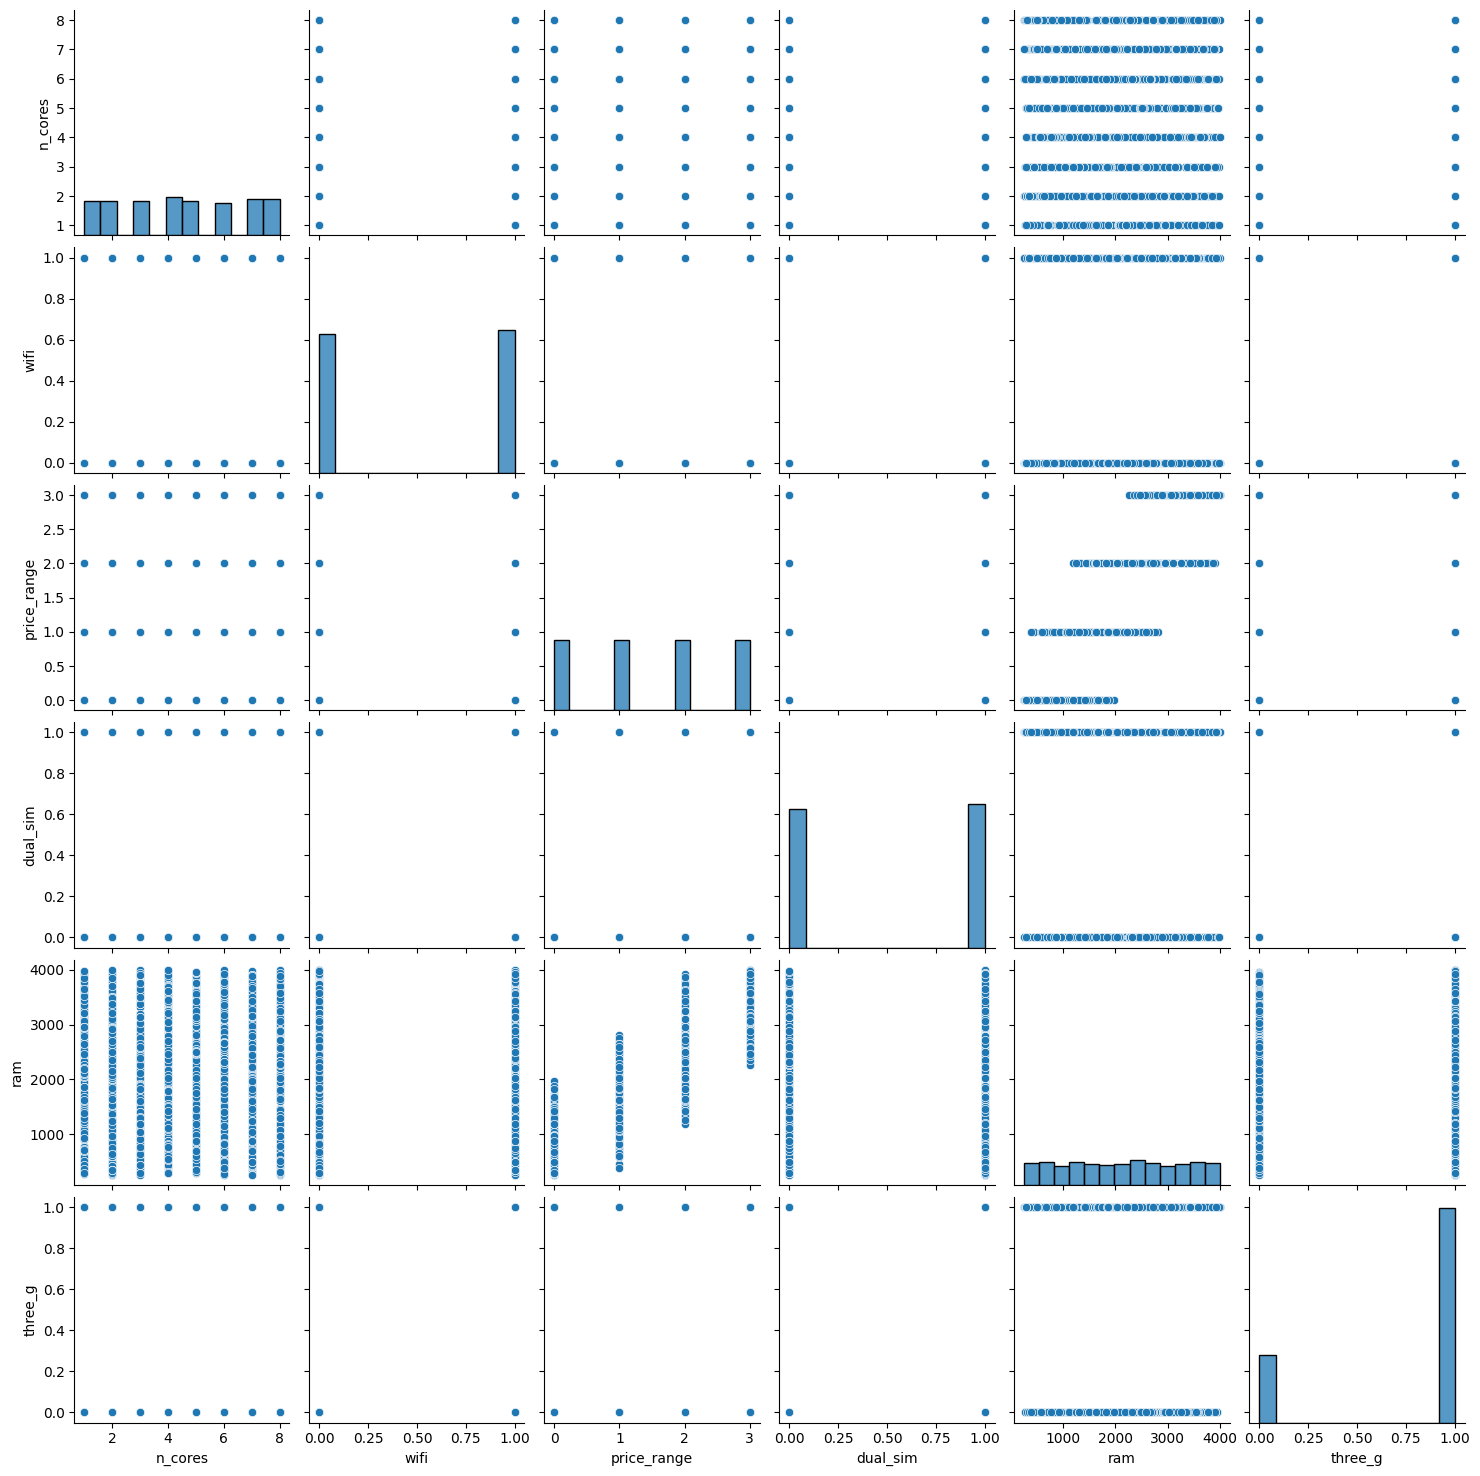

In [26]:
sns.pairplot(mobile_train, vars=['n_cores', 'wifi', 'price_range', 'dual_sim', 'ram', 'three_g'])

# 4. Data Preprocessing

* I need to make the data ready for ML models.
* Feature scaling will be done.
* Categorical features are already encoded → no extra work needed.

Next, I take the training labels from the training data before scaling.

In [27]:
x_train = mobile_train.drop('price_range', axis=1)
y_train = mobile_train['price_range']

### Feature Scaling

I will normalize the data with sklearn MinMaxScaler where the numerical values will be scaled to values between 0 and 1.

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_x_train = scaler.fit_transform(x_train)

# 5. Choosing and training a model

In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(normalized_x_train, y_train)

LogisticRegression()

In [30]:
# evaluating the model on training data and labels
log_model.score(normalized_x_train, y_train)

0.9465

94.65% is not that bad.

Now gonna train another linear classifier called SGD (Stockastic Gradient Descent) classifier on the same dataset.

### Trying another model (SGD)

In [31]:
# SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(normalized_x_train, y_train)

SGDClassifier()

In [32]:
# score
sgd_clf.score(normalized_x_train, y_train)

0.777

Not soo good than a simple logistic classifier.

Now gonna try a decision tree model.

### Trying Another Model (Decision Tree)

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(normalized_x_train, y_train)

DecisionTreeClassifier()

In [34]:
# score
tree_clf.score(normalized_x_train, y_train)

1.0

Ohh so decision tree perfectly fitted the data! But could that be true? This is a signal that the model overfitted. (i.e, it memorized the training data but would likely be poor when tested on the new data). Overfitting is usually caused by using complex models and small training data.

# 6. Model Evaluation

### 🔹 Cross Validation (Logistic Regression, SGD, Decision Tree)

In [35]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_scores = cross_val_score(log_model, normalized_x_train, y_train, cv=10)
print("Logistic Regression:", log_scores.mean())

# SGD Classifier
sgd_scores = cross_val_score(sgd_clf, normalized_x_train, y_train, cv=10)
print("SGD Classifier:", sgd_scores.mean())

# Decision Tree
tree_scores = cross_val_score(tree_clf, normalized_x_train, y_train, cv=10)
print("Decision Tree:", tree_scores.mean())

Logistic Regression: 0.9244999999999999
SGD Classifier: 0.744
Decision Tree: 0.835


### 🔹 Predictions with Cross Validation

In [36]:
from sklearn.model_selection import cross_val_predict

predictions_on_train = cross_val_predict(log_model, normalized_x_train, y_train, cv=10)

### 🔹 Confusion Matrix

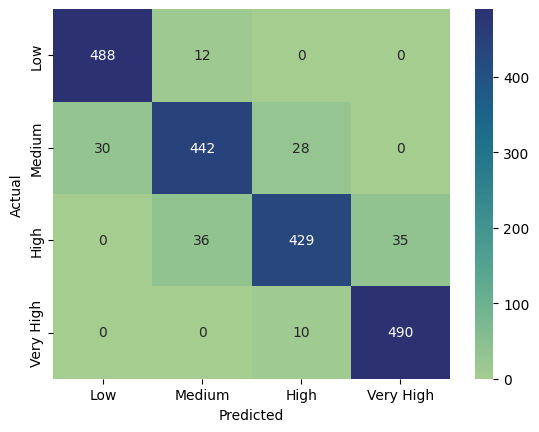

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, predictions_on_train)

sns.heatmap(cm, annot=True, fmt='d', cmap='crest',
            xticklabels=['Low', 'Medium', 'High', 'Very High'],
            yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 🔹 Accuracy, Precision, Recall, F1

In [38]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_train, predictions_on_train))
print("\nClassification Report:\n")
print(classification_report(y_train, predictions_on_train))

Accuracy: 0.9245

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



✅ Summary Notes:
* Cross Validation → train/test in folds → reliable scores.
* Confusion Matrix → shows correct vs incorrect predictions.
* Accuracy → overall correctness.
* Precision/Recall/F1 → detailed performance per class.
* Best model here: Logistic Regression (~92% accuracy).